### Installation & Loading Dataset

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.8.4.1 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cudnn-cu12==9.1.0.70; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cudnn-cu12 9.3.0.75 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cufft-cu12==11.2.1.3; platform_system == "Linux" and platform_machine == "x86_64", but you 

In [3]:
!pip install torchtext==0.17.0 --index-url https://download.pytorch.org/whl/cu118
# !pip install torchtext

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.7/811.7 MB 2.0 MB/s eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.6 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 86.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 105.5 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 2.3 MB/s eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.1 MB/s eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 10.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 30.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:

import torch
import torchtext

print(f'torch version: {torch.__version__}')
print(f'torchtext version: {torchtext.__version__}')

torch version: 2.2.0+cu118
torchtext version: 0.17.0+cpu


### Load and preprocess data

In [5]:
import torch
from torchtext.vocab import GloVe
from datasets import load_dataset
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

dataset = load_dataset('squad')

def dataset_to_dataframe(ds, limit=20000):
    df = pd.DataFrame(ds)
    
    df['context_len'] = df['context'].apply(len)
    df_sorted = df.sort_values(by='context_len').iloc[:limit]
    
    df_sorted = df_sorted[['context', 'question', 'answers']]
    
    df_sorted['answer'] = df_sorted['answers'].apply(lambda x: x['text'][0])
    
    # print minimum answers length and maximum
    print(df_sorted['answer'].apply(len).min())
    print(df_sorted['answer'].apply(len).max())
    
    df_sorted.drop(columns=['answers'], inplace=True)
    
    df_sorted['context_tok'] = df_sorted['context'].apply(lambda x: word_tokenize(x.lower()))
    df_sorted['question_tok'] = df_sorted['question'].apply(lambda x: word_tokenize(x.lower()))
    df_sorted['answer_tok'] = df_sorted['answer'].apply(lambda x: word_tokenize(x.lower()))
    
    print(df_sorted.head(2))
    
    # print how many have no answer
    print(df_sorted[df_sorted['answer'] == ''].shape)

    return df_sorted

train_df_sorted = dataset_to_dataframe(dataset['train'], limit=20000)
val_df_sorted = dataset_to_dataframe(dataset['validation'], limit=10000)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


README.md:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

1
181
                                                 context  \
12947  The Oklahoma School of Science and Mathematics...   
12697  In the past, the Malays used to call the Portu...   

                                                question  \
12947  Where is The Oklahoma School of Science and Ma...   
12697                  What does the term refer to now?    

                                        answer  \
12947                            Oklahoma City   
12697  the modern Kristang creoles of Malaysia   

                                             context_tok  \
12947  [the, oklahoma, school, of, science, and, math...   
12697  [in, the, past, ,, the, malays, used, to, call...   

                                            question_tok  \
12947  [where, is, the, oklahoma, school, of, science...   
12697         [what, does, the, term, refer, to, now, ?]   

                                           answer_tok  
12947                                [oklahoma, city]  
12697  

### Build Vocabulary & Embeddings

In [ ]:
from torchtext.vocab import build_vocab_from_iterator, GloVe
from collections import Counter
import itertools

def preprocess_data(df, vocab=None, max_vocab_size=25000, glove_dim=100):
    # Define special tokens
    special_tokens = ['<pad>', '<sos>', '<eos>', '<unk>']

    if vocab is None:
        # Flatten tokens from all sources into a single iterator
        def yield_tokens():
            for tokens in itertools.chain(
                df['context_tok'],
                df['question_tok'],
                df['answer_tok']
            ):
                yield tokens

        # Build Vocabulary
        vocab = build_vocab_from_iterator(
            yield_tokens(),
            specials=special_tokens,
            max_tokens=max_vocab_size
        )

        vocab.set_default_index(vocab['<unk>'])

        glove_vectors = GloVe(name='6B', dim=glove_dim)

        embedding_matrix = torch.zeros(len(vocab), glove_dim)
        for idx, token in enumerate(vocab.get_itos()):
            if token in glove_vectors.stoi:
                embedding_matrix[idx] = glove_vectors[token]
            else:
                embedding_matrix[idx] = torch.randn(glove_dim) * 0.1
    else:
        embedding_matrix = None

    def encode(tokens):
        return [vocab[token] for token in tokens]

    # Apply encoding to the dataframe
    df['context_idx'] = df['context_tok'].apply(encode)
    df['question_idx'] = df['question_tok'].apply(encode)
    df['answer_idx'] = df['answer_tok'].apply(
        lambda x: [vocab['<sos>']] + encode(x) + [vocab['<eos>']]
    )

    return df, vocab, embedding_matrix

train_df_sorted, vocab, embedding_matrix = preprocess_data(train_df_sorted)
val_df_sorted, val_vocab, val_embedding_matrix = preprocess_data(val_df_sorted, vocab=vocab)

.vector_cache/glove.6B.zip: 862MB [02:39, 5.40MB/s]                               
100%|█████████▉| 399999/400000 [00:17<00:00, 23492.87it/s]


In [7]:
train_df_sorted

,context,question,answer,context_tok,question_tok,answer_tok,context_idx,question_idx,answer_idx
12947,The Oklahoma School of Science and Mathematics...,Where is The Oklahoma School of Science and Ma...,Oklahoma City,"[the, oklahoma, school, of, science, and, math...","[where, is, the, oklahoma, school, of, science...","[oklahoma, city]","[4, 543, 168, 6, 921, 9, 6027, 5, 11, 168, 18,...","[86, 13, 4, 543, 168, 6, 921, 9, 6027, 165, 12]","[1, 543, 39, 2]"
12697,"In the past, the Malays used to call the Portu...",What does the term refer to now?,the modern Kristang creoles of Malaysia,"[in, the, past, ,, the, malays, used, to, call...","[what, does, the, term, refer, to, now, ?]","[the, modern, kristang, creoles, of, malaysia]","[8, 4, 812, 5, 4, 3, 59, 10, 1012, 4, 609, 3, ...","[19, 105, 4, 147, 1280, 10, 200, 12]","[1, 4, 167, 3, 3, 6, 5439, 2]"
12696,"In the past, the Malays used to call the Portu...",What term did the Malays use for the Portugues...,Nasrani,"[in, the, past, ,, the, malays, used, to, call...","[what, term, did, the, malays, use, for, the, ...",[nasrani],"[8, 4, 812, 5, 4, 3, 59, 10, 1012, 4, 609, 3, ...","[19, 147, 44, 4, 3, 91, 18, 4, 609, 3, 12]","[1, 9724, 2]"
24533,New Delhi has been selected as one of the hund...,What is one Indian city that has been selected...,New Delhi,"[new, delhi, has, been, selected, as, one, of,...","[what, is, one, indian, city, that, has, been,...","[new, delhi]","[42, 364, 36, 56, 2738, 15, 50, 6, 4, 2061, 58...","[19, 13, 50, 586, 39, 24, 36, 56, 2738, 10, 35...","[1, 42, 364, 2]"
24531,New Delhi has been selected as one of the hund...,What is the name of the mission to develop Ind...,Smart Cities Mission,"[new, delhi, has, been, selected, as, one, of,...","[what, is, the, name, of, the, mission, to, de...","[smart, cities, mission]","[42, 364, 36, 56, 2738, 15, 50, 6, 4, 2061, 58...","[19, 13, 4, 107, 6, 4, 1749, 10, 1908, 586, 57...","[1, 5748, 384, 1749, 2]"
...,...,...,...,...,...,...,...,...,...
16850,"Shortly after the unification of the region, t...",Who fled with the Jin court to the South?,nobles and wealthy families,"[shortly, after, the, unification, of, the, re...","[who, fled, with, the, jin, court, to, the, so...","[nobles, and, wealthy, families]","[2664, 64, 4, 6816, 6, 4, 193, 5, 4, 202, 3982...","[43, 6941, 21, 4, 3982, 266, 10, 4, 128, 12]","[1, 4057, 9, 3378, 764, 2]"
78307,"In September 1940, Japan decided to cut China'...",Who controled Indochina in 1940?,Vichy France,"[in, september, 1940, ,, japan, decided, to, c...","[who, controled, indochina, in, 1940, ?]","[vichy, france]","[8, 331, 2163, 5, 565, 1253, 10, 1533, 145, 23...","[43, 3, 5851, 8, 2163, 12]","[1, 7870, 257, 2]"
78308,"In September 1940, Japan decided to cut China'...",Who were the Axis Powers along with Japan in 1...,Germany and Italy,"[in, september, 1940, ,, japan, decided, to, c...","[who, were, the, axis, powers, along, with, ja...","[germany, and, italy]","[8, 331, 2163, 5, 565, 1253, 10, 1533, 145, 23...","[43, 31, 4, 5385, 861, 179, 21, 565, 8, 2163, 12]","[1, 408, 9, 910, 2]"
40910,Incandescent light bulbs consist of an air-tig...,What function do small wires in a light bulb's...,Small wires embedded in the stem in turn suppo...,"[incandescent, light, bulbs, consist, of, an, ...","[what, function, do, small, wires, in, a, ligh...","[small, wires, embedded, in, the, stem, in, tu...","[2699, 396, 4311, 2222, 6, 34, 3, 3358, 13032,...","[19, 1396, 115, 285, 4298, 8, 11, 396, 5258, 2...","[1, 285, 4298, 4621, 8, 4, 5091, 8, 1554, 338,..."


### DataLoader

In [8]:
from torch.utils.data import DataLoader

def pad_seq(seq, max_len):
    return seq + [vocab['<pad>']] * (max_len - len(seq))

def collate_fn(batch):
    context, question, answer = zip(*batch)
    context_lens = [len(c) for c in context]
    question_lens = [len(q) for q in question]
    answer_lens = [len(a) for a in answer]

    context_max = max(context_lens)
    question_max = max(question_lens)
    answer_max = max(answer_lens)

    context_padded = [pad_seq(c, context_max) for c in context]
    question_padded = [pad_seq(q, question_max) for q in question]
    answer_padded = [pad_seq(a, answer_max) for a in answer]

    return (torch.tensor(context_padded), torch.tensor(question_padded), torch.tensor(answer_padded))

train_data = list(zip(train_df_sorted['context_idx'], train_df_sorted['question_idx'], train_df_sorted['answer_idx']))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, collate_fn=collate_fn)

val_data = list(zip(val_df_sorted['context_idx'], val_df_sorted['question_idx'], val_df_sorted['answer_idx']))
val_loader = DataLoader(val_data, batch_size=32, shuffle=False, collate_fn=collate_fn)

### Model (Encoder + Attention + Decoder)

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class Encoder(nn.Module):
    def __init__(self, embedding_matrix, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix)
        self.gru = nn.GRU(embedding_matrix.size(1), hidden_dim, batch_first=True)

    def forward(self, x):
        embedded = self.embedding(x)
        outputs, hidden = self.gru(embedded)
        return outputs, hidden

class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.attn = nn.Linear(hidden_dim * 2, hidden_dim)
        self.v = nn.Linear(hidden_dim, 1, bias=False)

    def forward(self, hidden, encoder_outputs):
        hidden = hidden[-1].unsqueeze(1).repeat(1, encoder_outputs.size(1), 1)
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim=2)))
        attention = self.v(energy).squeeze(2)
        return F.softmax(attention, dim=1)

class Decoder(nn.Module):
    def __init__(self, embedding_matrix, hidden_dim, vocab_size):
        super().__init__()
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix)
        self.attention = Attention(hidden_dim)
        self.gru = nn.GRU(embedding_matrix.size(1) + hidden_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, input, hidden, encoder_outputs):
        input = input.unsqueeze(1)
        embedded = self.embedding(input)
        attn_weights = self.attention(hidden, encoder_outputs).unsqueeze(1)
        context = torch.bmm(attn_weights, encoder_outputs)
        rnn_input = torch.cat((embedded, context), dim=2)
        output, hidden = self.gru(rnn_input, hidden)
        prediction = self.fc(output.squeeze(1))
        return prediction, hidden

### Training Setup & Loop

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

enc = Encoder(embedding_matrix, hidden_dim=128).to(device)
dec = Decoder(embedding_matrix, hidden_dim=128, vocab_size=len(vocab)).to(device)

optimizer = torch.optim.Adam(list(enc.parameters()) + list(dec.parameters()))
criterion = nn.CrossEntropyLoss(ignore_index=vocab['<pad>'])

EPOCHS = 10

train_loss = []
val_loss = []

# for idx, token in enumerate(vocab.get_itos()):
    # print(f"idx: ${idx}, token: ${token}")

def decode(tokens):
    return ' '.join([vocab.lookup_token(token) for token in tokens if token not in [vocab['<pad>'], vocab['<sos>'], vocab['<eos>'], vocab['<unk>']]])

for epoch in range(EPOCHS):
    enc.train()
    dec.train()
    epoch_train_loss, total_tokens, correct_tokens = 0, 0, 0

    for context, question, answer in train_loader:
        context, question, answer = context.to(device), question.to(device), answer.to(device)
        optimizer.zero_grad()

        encoder_outputs, hidden = enc(torch.cat((context, question), dim=1))
        input_token = answer[:, 0]

        loss = 0
        for t in range(1, answer.size(1)):
            output, hidden = dec(input_token, hidden, encoder_outputs)

            # Calculate loss
            loss += criterion(output, answer[:, t])

            # Accuracy
            predicted = output.argmax(dim=1)
            mask = answer[:, t] != vocab['<pad>']
            correct_tokens += (predicted == answer[:, t]).masked_select(mask).sum().item()
            total_tokens += mask.sum().item()

            input_token = answer[:, t]

        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() / answer.size(1)

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_loss.append(avg_train_loss)
    accuracy = correct_tokens / total_tokens if total_tokens > 0 else 0
    print(f"\nEpoch {epoch+1}\nTraining Loss: {avg_train_loss:.4f}, Token Accuracy: {accuracy:.4f}")
    
    # Validation
    enc.eval()
    dec.eval()
    epoch_val_loss, total_tokens, correct_tokens = 0, 0, 0

    with torch.no_grad():
        for context, question, answer in val_loader:
            context, question, answer = context.to(device), question.to(device), answer.to(device)

            encoder_outputs, hidden = enc(torch.cat((context, question), dim=1))
            input_token = answer[:, 0]

            loss = 0
            for t in range(1, answer.size(1)):
                output, hidden = dec(input_token, hidden, encoder_outputs)
                loss += criterion(output, answer[:, t])

                # Accuracy
                predicted = output.argmax(dim=1)
                mask = answer[:, t] != vocab['<pad>']
                correct_tokens += (predicted == answer[:, t]).masked_select(mask).sum().item()
                total_tokens += mask.sum().item()

                input_token = answer[:, t]

            epoch_val_loss += loss.item() / answer.size(1)
    avg_val_loss = epoch_val_loss / len(val_loader)
    val_loss.append(avg_val_loss)
    val_accuracy = correct_tokens / total_tokens if total_tokens > 0 else 0
    print(f"Validation Loss: {avg_val_loss:.4f}, Validation Token Accuracy: {val_accuracy:.4f}")


Epoch 1
Training Loss: 5.9549, Token Accuracy: 0.2712
Validation Loss: 5.1254, Validation Token Accuracy: 0.2688

Epoch 2
Training Loss: 5.2104, Token Accuracy: 0.2840
Validation Loss: 5.0377, Validation Token Accuracy: 0.2729

Epoch 3
Training Loss: 4.9097, Token Accuracy: 0.2896
Validation Loss: 4.9835, Validation Token Accuracy: 0.2792

Epoch 4
Training Loss: 4.5980, Token Accuracy: 0.2949
Validation Loss: 4.9240, Validation Token Accuracy: 0.2940

Epoch 5
Training Loss: 4.2639, Token Accuracy: 0.2996
Validation Loss: 4.9387, Validation Token Accuracy: 0.2945

Epoch 6
Training Loss: 3.9644, Token Accuracy: 0.3051
Validation Loss: 4.8896, Validation Token Accuracy: 0.3130

Epoch 7
Training Loss: 3.6199, Token Accuracy: 0.3114
Validation Loss: 4.9112, Validation Token Accuracy: 0.3145

Epoch 8
Training Loss: 3.3043, Token Accuracy: 0.3214
Validation Loss: 4.9413, Validation Token Accuracy: 0.3137

Epoch 9
Training Loss: 3.0075, Token Accuracy: 0.3366
Validation Loss: 4.9754, Validati

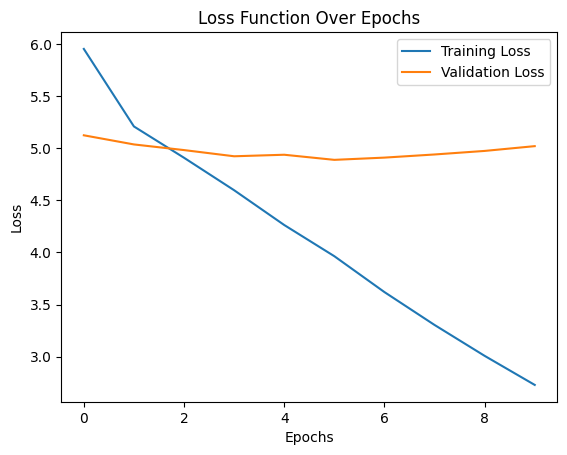

In [11]:
import matplotlib.pyplot as plt

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Over Epochs')
plt.legend()
plt.show()